In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn as skl
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('/content/drive/MyDrive/DATASET/laptop_prices.csv')
df
df.shape

(11768, 11)

In [3]:
df

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83
...,...,...,...,...,...,...,...,...,...,...,...
11763,Acer,Intel i3,4,2TB SSD,Nvidia RTX 2060,17.3,1366x768,11.5,1.58,macOS,704.82
11764,Asus,Intel i3,4,2TB SSD,AMD Radeon RX 6800,16.0,1366x768,9.5,2.14,Linux,775.59
11765,Razer,AMD Ryzen 9,4,2TB SSD,AMD Radeon RX 6600,15.6,2560x1440,8.2,2.05,Linux,2789.46
11766,Samsung,AMD Ryzen 7,16,512GB SSD,Integrated,13.3,1920x1080,7.5,1.48,macOS,1067.13


In [4]:
df.isnull().sum()

,0
Brand,0
Processor,0
RAM (GB),0
Storage,0
GPU,0
Screen Size (inch),0
Resolution,0
Battery Life (hours),0
Weight (kg),0
Operating System,0


In [5]:
x=df.drop(['Price ($)'],axis=1)
x

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux
...,...,...,...,...,...,...,...,...,...,...
11763,Acer,Intel i3,4,2TB SSD,Nvidia RTX 2060,17.3,1366x768,11.5,1.58,macOS
11764,Asus,Intel i3,4,2TB SSD,AMD Radeon RX 6800,16.0,1366x768,9.5,2.14,Linux
11765,Razer,AMD Ryzen 9,4,2TB SSD,AMD Radeon RX 6600,15.6,2560x1440,8.2,2.05,Linux
11766,Samsung,AMD Ryzen 7,16,512GB SSD,Integrated,13.3,1920x1080,7.5,1.48,macOS


In [6]:
y=df['Price ($)']
y

,Price ($)
0,3997.07
1,1355.78
2,2673.07
3,751.17
4,2059.83
...,...
11763,704.82
11764,775.59
11765,2789.46
11766,1067.13


In [7]:
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()
for col in x.select_dtypes(include=['object']).columns:
    x[col] = encoder.fit_transform(x[col])


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)


In [9]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")


MAE: 587.7641000278919
MSE: 672389.1467703646
R² Score: 0.6070171046556894


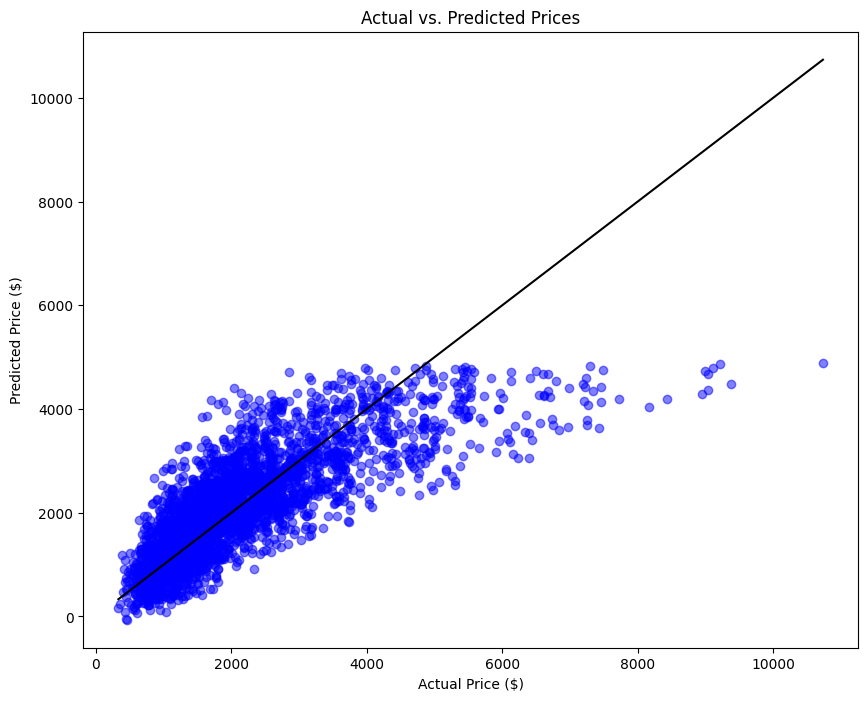

In [11]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='solid')
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Actual vs. Predicted Prices")
plt.show()


### The scatter plot indicates a positive correlation between actual and predicted prices, showing that the model captures trends but with noticeable errors. Deviations from the ideal black line suggest underprediction and overprediction, particularly in higher price ranges. While the model performs well for lower prices, its accuracy declines for higher values, highlighting areas for improvement. Again,The model has a Mean Absolute Error (MAE) of 588.66, meaning predictions deviate by around $588 on average. The high Mean Squared Error (MSE) of 699,890 suggests large errors, especially for higher-priced items. With an R² score of 0.61, the model explains 61% of the variance in actual prices, indicating moderate performance but room for improvement.









# LOGISTIC REGRESSION

In [12]:
import pandas as pd

# Convert price into categories (Low, Medium, High)
df['Price Category'] = pd.qcut(df['Price ($)'], q=3, labels=['Low', 'Medium', 'High'])



In [13]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Encode categorical features
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col])

# Encode the target variable
df['Price Category'] = encoder.fit_transform(df['Price Category'])


In [14]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Price ($)', 'Price Category'])  # Drop original price column
y = df['Price Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [15]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Accuracy: 0.6492182188987083
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       994
           1       0.69      0.74      0.71       973
           2       0.49      0.48      0.49       975

    accuracy                           0.65      2942
   macro avg       0.65      0.65      0.65      2942
weighted avg       0.65      0.65      0.65      2942



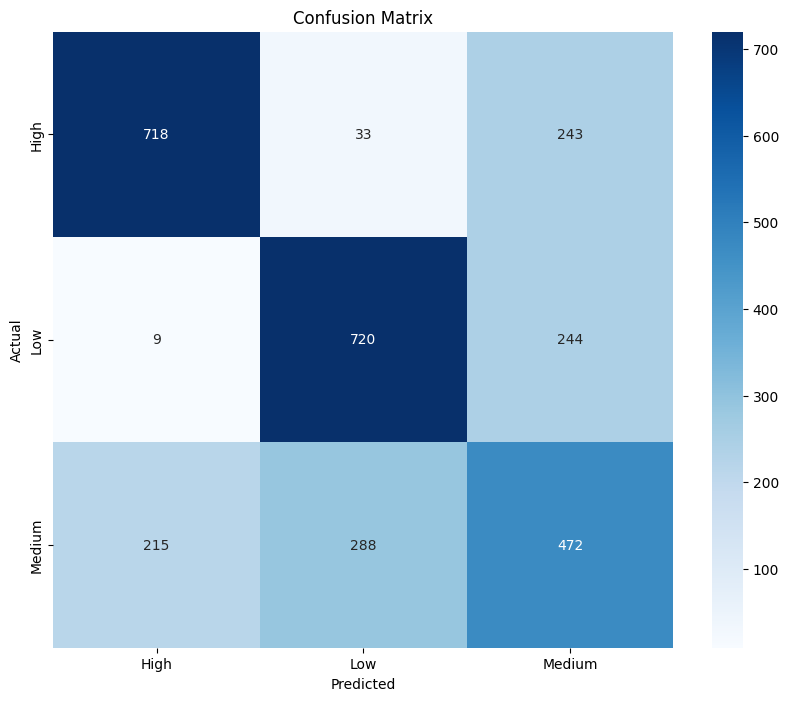

In [16]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



# Random Forest(Numerical Value)

MAE: 0.4108871515975527
MSE: 0.3339317131203263
R² Score: 0.49504249182674087


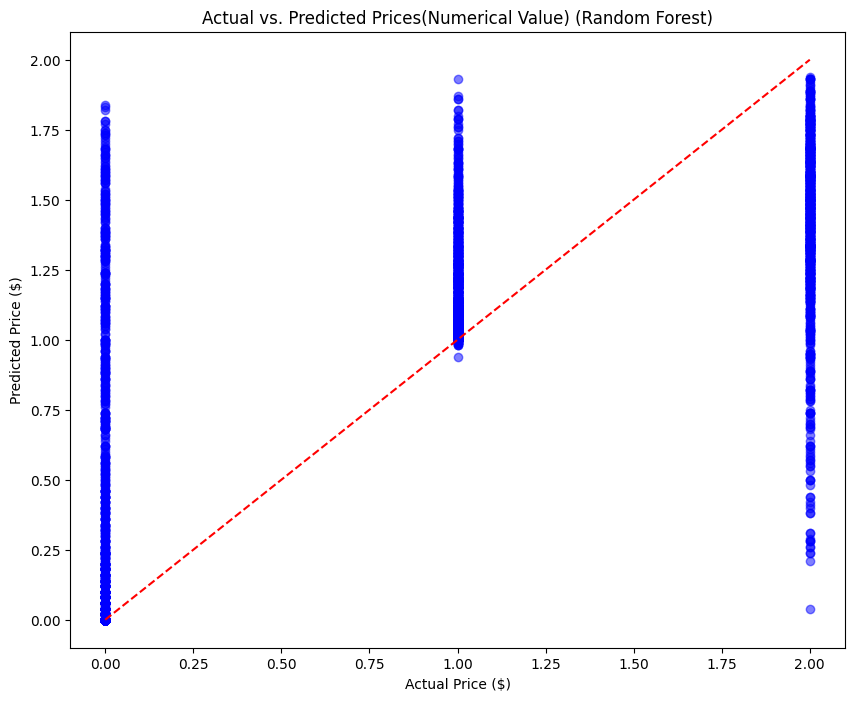

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")


plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')  # Perfect line
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Actual vs. Predicted Prices(Numerical Value) (Random Forest)")
plt.show()


# Random Forest (Categorical Data)

Accuracy: 0.8169073916737468
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       815
           1       0.87      0.86      0.86       776
           2       0.71      0.74      0.72       763

    accuracy                           0.82      2354
   macro avg       0.82      0.82      0.82      2354
weighted avg       0.82      0.82      0.82      2354



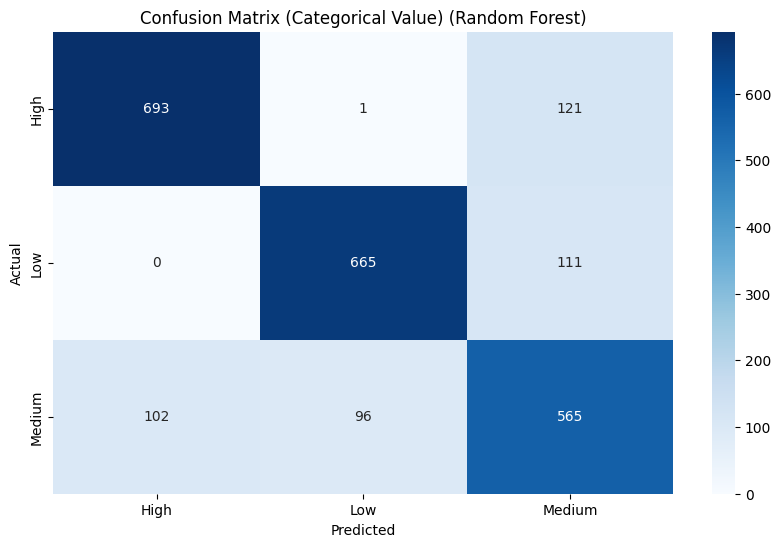

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Convert price into categories (if not done yet)
df['Price Category'] = pd.qcut(df['Price ($)'], q=3, labels=['Low', 'Medium', 'High'])
df['Price Category'] = encoder.fit_transform(df['Price Category'])

# Define features and target
X_class = df.drop(columns=['Price ($)', 'Price Category'])
y_class = df['Price Category']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Train Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Make predictions
y_pred_class = classifier.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred_class)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Categorical Value) (Random Forest)")
plt.show()
